In [2]:
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('housing-train-data-6628a4723213d886993351.csv')

In [3]:
pd.set_option('display.max_rows', 0)
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
5,8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
6,5438,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN
7,14856,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN
8,19956,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
5,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
6,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN
7,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN
8,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...


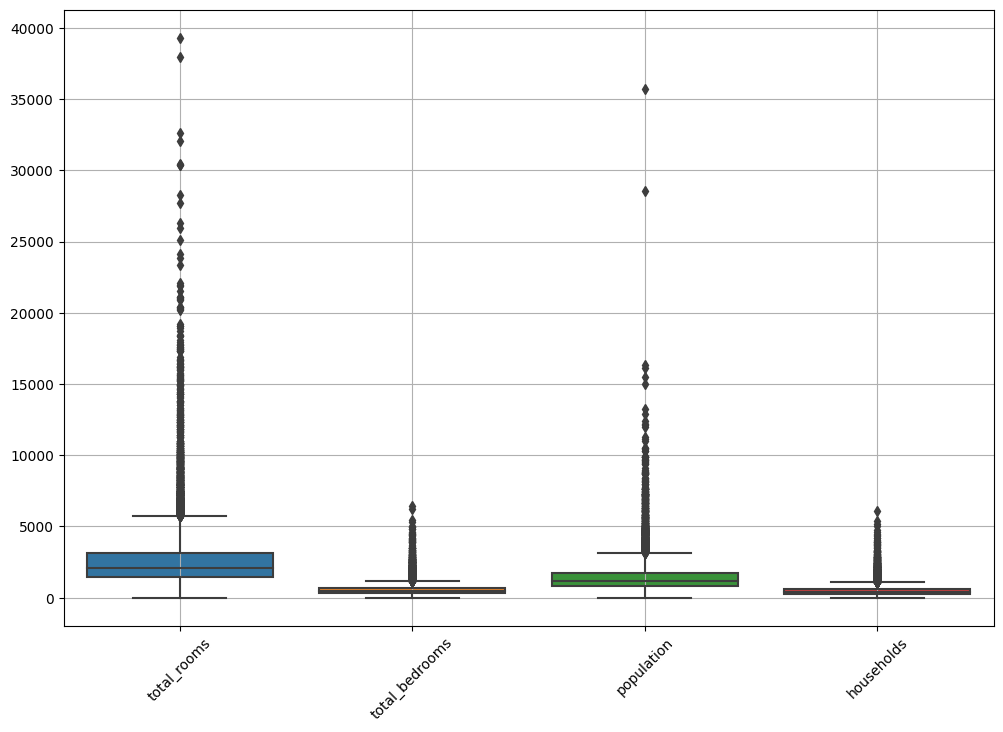

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['total_rooms', 'total_bedrooms', 'population', 'households']])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

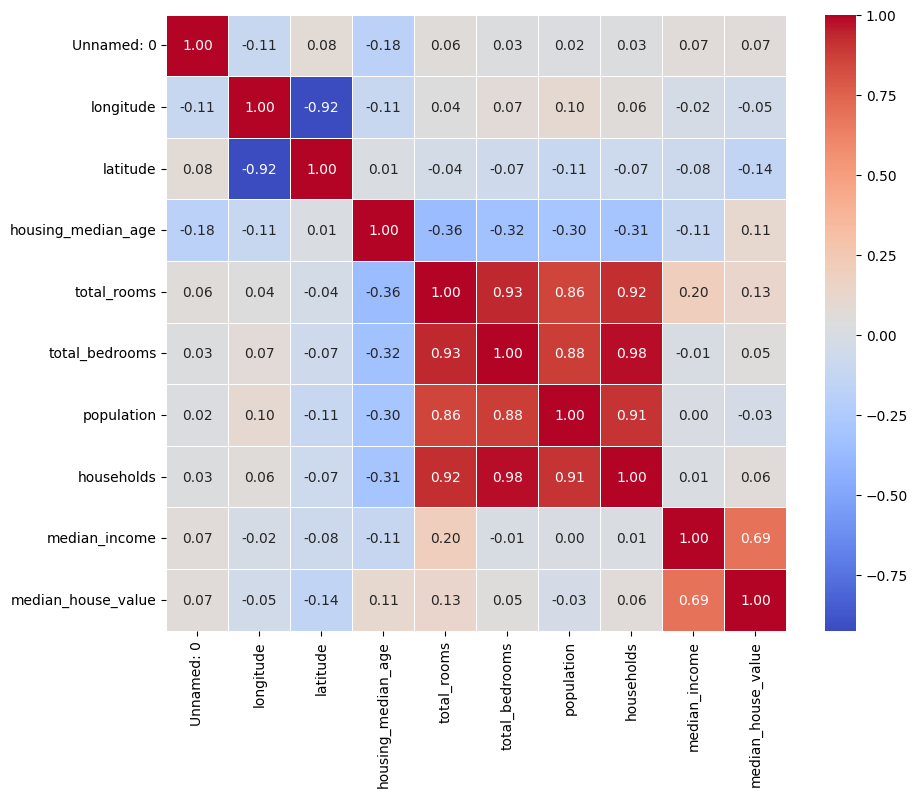

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [6]:
# import math

# def haversine_distance(lat1, lon1, lat2, lon2):
#     # Convertir les degrés en radians
#     lat1 = math.radians(lat1)
#     lon1 = math.radians(lon1)
#     lat2 = math.radians(lat2)
#     lon2 = math.radians(lon2)

#     # Distance entre les latitudes et longitudes
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1

#     # Formule de la distance haversine
#     a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
#     distance = 6371 * c  # Rayon moyen de la Terre en kilomètres
#     return distance

# # Coordonnées de San Francisco
# la_lat = 34.003342
# la_lon = -118.485832

# maison_lat = 36.169941
# maison_lon = -115.139830

# distance_sf = haversine_distance(maison_lat, maison_lon, la_lat, la_lon)
# print("Distance de la maison à San Francisco :", distance_sf, "kilomètres")
# def calculer_distance_sf(row):
#     return haversine_distance(row['latitude'], row['longitude'], la_lat, la_lon)
# df['distance_la'] = df.apply(calculer_distance_sf, axis=1)
# df.head()

Distance de la maison à San Francisco : 388.1923136813042 kilomètres


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,distance_la
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,331.215391
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,72.833475
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,327.527099
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,18.679677
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,488.188587


In [7]:
# df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [8]:
# df['population_per_household'] = df['population'] / df['households']

In [6]:
# df['log_median_house_value'] = np.log1p(df['median_house_value'])

In [ ]:
# enc = OneHotEncoder(handle_unknown='ignore')

# enc.fit(df[['ocean_proximity']])
# enc_array = enc.transform(df[['ocean_proximity']]).toarray()

# encoded_colm = pd.DataFrame(enc_array, columns=enc.get_feature_names_out(['ocean_proximity']))

# df = pd.concat([df, encoded_colm], axis=1)

# df = df.drop(['ocean_proximity'], axis=1)

# print(df.head(10))

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_house_value
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,11.184435
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,12.521252
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,10.973375
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,12.206078
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,11.677601
5,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN,12.660649
6,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN,13.122367
7,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN,12.059896
8,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND,11.590821
...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
log_value = 12.521252
valeur_de_base = math.exp(log_value)
valeur_de_base

274101.01902596495

In [ ]:
# models = {
#     "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
#     "SVR": SVR(),
#     "KNN": KNeighborsRegressor(),
#     "Ridge Regression": Ridge(),
#     "Lasso Regression": Lasso()
# }

# # Entraînement et évaluation des modèles
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"Model: {name}")
#     print("Mean Squared Error:", mse)
#     print("R-squared:", r2)
#     print()

In [7]:
X = df[['median_income','bedrooms_per_room','households','population_per_household','housing_median_age','longitude','latitude','population', 'total_rooms','total_bedrooms','distance_la','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']]
y = df['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = GradientBoostingRegressor(random_state=42)
model_simple.fit(X_train[['median_income']], y_train)
y_pred_simple = model_simple.predict(X_test[['median_income']])
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

model_multiple = GradientBoostingRegressor(random_state=42)
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Mean Squared Error:", mse_multiple)
print("R-squared:", r2_multiple)

KeyError: "['bedrooms_per_room', 'population_per_household', 'distance_la', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'] not in index"

In [14]:
X = df.drop(['log_median_house_value','median_house_value'], axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore'))
])
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

clf = GradientBoostingRegressor(random_state=200)
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('model', GradientBoostingRegressor(random_state=200))])

In [15]:
clf_pipeline.fit(X_train, y_train)
# preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

Model score: 0.7692739105972406


In [16]:
import joblib

# Save pipeline to file "pipe.joblib"
joblib.dump(clf_pipeline,"pipe.joblib")

# Load pipeline when you want to use
same_pipe = joblib.load("pipe.joblib")